# House Price Prediction Model & Models Comparison

Moulding by:- Ranjesh Kumar
<br>
Email - Ranjeshsingh007@gmail.com


## Import statements

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx') #dataset provided by shack labs
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [70]:
df.shape

(414, 9)

In [71]:
df.isnull().any()

Transaction date                            False
House Age                                   False
Distance from nearest Metro station (km)    False
Number of convenience stores                False
latitude                                    False
longitude                                   False
Number of bedrooms                          False
House size (sqft)                           False
House price of unit area                    False
dtype: bool

In [72]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [73]:
df.corr()['House price of unit area'].sort_values(ascending=False)[1:]

Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

###### The number of convenience stores, latitude and longitude are the features that have a significant positive correlation with the target house price feature. On the other hand, distance from the nearest metro station (in km) has a high negative correlation with house price.

<AxesSubplot:>

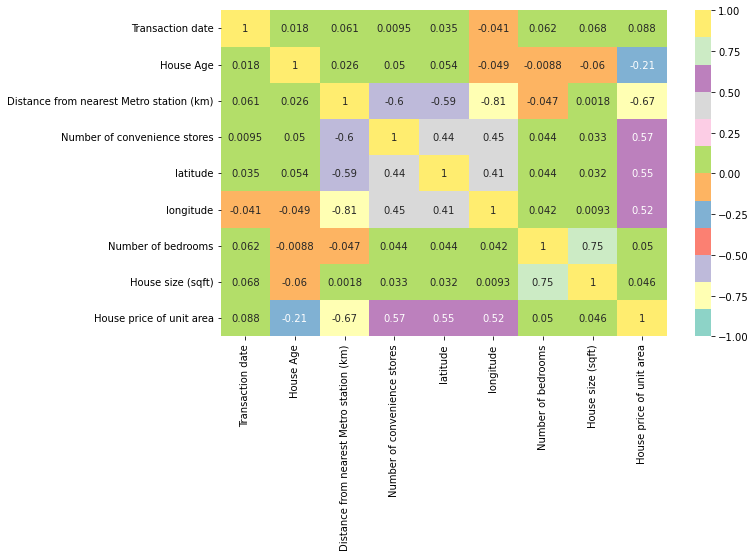

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Set3',vmin=-1)
#plt.show()

# Make a copy of original dataset 

In [75]:
df_copy = df.copy()
df_copy.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Splitting the dataset into training and test sets

In [76]:
x = df.drop('House price of unit area',axis=1) # x= feature
y = df['House price of unit area'] # y= target



In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101,shuffle=True)


# Training & Evaluation of Models

In [78]:

regr=LinearRegression()
regr.fit(x_train,y_train)
prediction=regr.predict(x_test)
print('RMSE =', np.sqrt(mean_squared_error(y_test,prediction)))
print("R2 Score =",r2_score(y_test,prediction))

RMSE = 6.866134533815638
R2 Score = 0.6438652713414827


# if we want to compare more than a model then we need  to create a function to generate 'RMSE & R2_Score'

In [79]:
#def testting_model(model):
  #  model.fit(x_train,y_train)
   # prediction = model.predict(x_test)
  #  print("RMSE:",np.sqrt(mean_squared_error(y_test,prediction)))
  #  print("R2 Score:",r2_score(y_test,prediction))
   # models.append(str(model).split('(')[0])
    #scores.append(r2_score(y_test,prediction))


In [80]:
#testting_model(LinearRegression())

In [81]:
#testting_model(DecisionTreeRegressor())

In [82]:
#testting_model(RandomForestRegressor())

# For model comparison

In [83]:
selected_models=[]
r2_scores=[]
def testting_model(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))
    selected_models.append(str(model).split('(')[0])
    r2_scores.append(r2_score(y_test,prediction))


   ####  we are comparing ( LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor() )

In [84]:
testting_model(LinearRegression())

RMSE: 6.866134533815638
R2 Score: 0.6438652713414827


In [85]:
testting_model(DecisionTreeRegressor())

RMSE: 8.070781870426186
R2 Score: 0.5079367526645031


In [86]:
testting_model(RandomForestRegressor())

RMSE: 5.665580204709838
R2 Score: 0.7575185653511997


In [87]:
testting_model(GradientBoostingRegressor())

RMSE: 5.401164674498241
R2 Score: 0.7796238731572835


# Making table for r2_score comparision

In [88]:
performances = pd.DataFrame([selected_models,r2_scores]).T
performances.columns = ['Model','R2 Score']
performances = performances.sort_values('R2 Score',ascending=False)
performances

,Model,R2 Score
3,GradientBoostingRegressor,0.779624
2,RandomForestRegressor,0.757519
0,LinearRegression,0.643865
1,DecisionTreeRegressor,0.507937


# Among the above models, GradientBoostingRegressor  is the best performing model with an excellent accuracy score of about 77.83%.

### $\color{red}{\text{ "we can use as much as model comparsion we want i used only 4 but this model use over maximum models" }}$